# Data Merging Basics
## Inner Join
- Joining is basically merging different tables.
- Merge method is used for inner joining.
- Inner joins only return rows where matching values exist in both tables.
- If a value is missing in one table, it will not appear in the merged result.

In [7]:
# Import pandas
import pandas as pd

# Read the CSV files
departments = pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\KaranCodes\Datacampcourses\Associate-Data-Scientist-Python-Track\resources\joiningdatawithpandas\university_departments.csv")
facilities = pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\KaranCodes\Datacampcourses\Associate-Data-Scientist-Python-Track\resources\joiningdatawithpandas\department_facilities.csv")

# Merge the departments and facilities tables on the dept_id column
departments_facilities = departments.merge(facilities, on='department_id', suffixes=('_dept', '_fac'))

# Print the shape of departments_facilities
print('departments_facilities table shape:', departments_facilities.shape)

# Print the original tables
print(departments.head(4))
print(facilities.head(4))

departments_facilities table shape: (50, 9)
   department_id         department_name   head_of_department  \
0              1        Computer Science      Dr. Alan Turing   
1              2  Mechanical Engineering     Dr. Nikola Tesla   
2              3       Civil Engineering  Dr. Isambard Brunel   
3              4  Electrical Engineering    Dr. Thomas Edison   

            building phone_number  
0  Engineering Block     555-1001  
1          Tech Park     555-1002  
2        Main Campus     555-1003  
3   Innovation Tower     555-1004  
   department_id library_available laboratory_available sports_facility  \
0              1               Yes                  Yes              No   
1              2               Yes                  Yes             Yes   
2              3               Yes                  Yes              No   
3              4               Yes                  Yes             Yes   

  parking_space  
0       Limited  
1      Adequate  
2       Limited  
3 

## One to many relationships
- In a one-to-many merge, a single row in the left table can match multiple rows in the right table.
- During the merge:
  - The left table’s row is repeated for each matching row in the right table.

In [8]:
# Load the business_owners and store_locations data
business_owners = pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\KaranCodes\Datacampcourses\Associate-Data-Scientist-Python-Track\resources\joiningdatawithpandas\business_owners.csv")
store_locations = pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\KaranCodes\Datacampcourses\Associate-Data-Scientist-Python-Track\resources\joiningdatawithpandas\store_locations.csv")

# Merge the datasets on 'account'
business_details = business_owners.merge(store_locations, on='account')

# Group by 'zip' and count the number of businesses
zip_count = business_details.groupby("zip").agg({'account': 'count'})

# Sort the results in descending order
sorted_zip = zip_count.sort_values("account", ascending=False)

# Print the sorted dataframe
print(sorted_zip.head())

       account
zip           
60619        3
60607        2
60605        2
60608        2
60632        2


## Merging multiple tables
- df1.merge(df2, on='col') \ .merge(df3, on='col') \ .merge(df4, on='col')
     

In [17]:
# Load the datasets
deliveries = pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\KaranCodes\Datacampcourses\Associate-Data-Scientist-Python-Track\resources\joiningdatawithpandas\deliveries.csv")
calendar = pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\KaranCodes\Datacampcourses\Associate-Data-Scientist-Python-Track\resources\joiningdatawithpandas\calendar.csv")
hubs = pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\KaranCodes\Datacampcourses\Associate-Data-Scientist-Python-Track\resources\joiningdatawithpandas\hubs.csv")

# Merge the deliveries, calendar, and hubs tables
deliveries_full = deliveries.merge(calendar, on=['year', 'month', 'day']) \
                            .merge(hubs, on='hub_id')

# Create the filter
filter_criteria = ((deliveries_full['month'] == 7) &
                   (deliveries_full['day_type'] == 'Weekday') &
                   (deliveries_full['hub_name'] == 'Central Hub'))

# Apply the filter and sum packages delivered
total_packages = deliveries_full.loc[filter_criteria, 'packages_delivered'].sum()

# Print the result
print(total_packages)

1880


In [18]:
# Merge deliveries and calendars on year, month, day
# Then merge result with hubs on hub_id with suffixes
deliveries_cal_hubs = deliveries.merge(calendar, on=['year', 'month', 'day']) \
                                .merge(hubs, on='hub_id', suffixes=('_cal', '_hub'))

# Group by hub_id, open_status, and delivery_type, then count number of deliveries
grouped_deliveries = deliveries_cal_hubs.groupby(['hub_id', 'open_status', 'delivery_type'], 
                                                  as_index=False).agg({'delivery_id':'count'})

# Sort by open_status, delivery_id, and hub_id
sorted_grouped_deliveries = grouped_deliveries.sort_values(["open_status", 'delivery_id', 'hub_id'], 
                                                           ascending=[False, True, True])

# Print the top few rows
print(sorted_grouped_deliveries.head())

    hub_id open_status delivery_type  delivery_id
5      102        Open       Express            1
7      102        Open      Standard            1
11     103        Open      Standard            1
2      101        Open       Express            2
9      103        Open       Express            2


## Left Join

In [1]:
import pandas as pd

books_info = pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\KaranCodes\Datacampcourses\Associate-Data-Scientist-Python-Track\resources\joiningdatawithpandas\books_info.csv")
books_sales = pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\KaranCodes\Datacampcourses\Associate-Data-Scientist-Python-Track\resources\joiningdatawithpandas\books_sales.csv")

# Merge the books_info table with the books_sales table using a left join
books_full = books_info.merge(books_sales, on='id', how='left')

# Count the number of rows in the budget column (revenue) that are missing
number_of_missing_sales = books_full['revenue'].isna().sum()

# Print the number of books missing sales data
print(number_of_missing_sales)


0


### Enriching a dataset using left join
- Left joins (using how='left' in .merge()) are great for enriching datasets.

In [2]:
# Perform a left join to merge books_info and books_sales
books_merged = books_info.merge(books_sales, on='id', how='left')

# Fill missing revenue values with 0 (assuming no sales were made)
books_merged['revenue'] = books_merged['revenue'].fillna(0)

# Calculate and print the average revenue for all books
average_revenue = books_merged['revenue'].mean()
print(f"Average Revenue of Books: {average_revenue}")

Average Revenue of Books: 1995000.0


## Other Joins
### Right join

In [3]:
mystery_books = pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\KaranCodes\Datacampcourses\Associate-Data-Scientist-Python-Track\resources\joiningdatawithpandas\mystery_books .csv")
fantasy_books = pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\KaranCodes\Datacampcourses\Associate-Data-Scientist-Python-Track\resources\joiningdatawithpandas\fantasy_books .csv")

# Merge mystery_books to fantasy_books with a right join
mystery_fantasy = mystery_books.merge(fantasy_books, on='book_id', how='right',
                                      suffixes=('_mys', '_fan'))

# Select only the rows where genre_mys is null (i.e., fantasy only)
fantasy_only = mystery_fantasy[mystery_fantasy['genre_mys'].isnull()]

# Merge books_info and fantasy_only with an inner join
books_and_fantasy_only = books_info.merge(fantasy_only, left_on='id', right_on='book_id')

# Print the first few rows and the shape of books_and_fantasy_only
print(books_and_fantasy_only.head())
print(books_and_fantasy_only.shape)


   id              title  popularity release_date  book_id genre_mys genre_fan
0   2  Project Hail Mary        90.5   2021-05-04        2       NaN   Fantasy
1   6             Verity        88.1   2018-12-07        6       NaN   Fantasy
2   9   The Night Circus        74.2   2011-09-13        9       NaN   Fantasy
(3, 7)


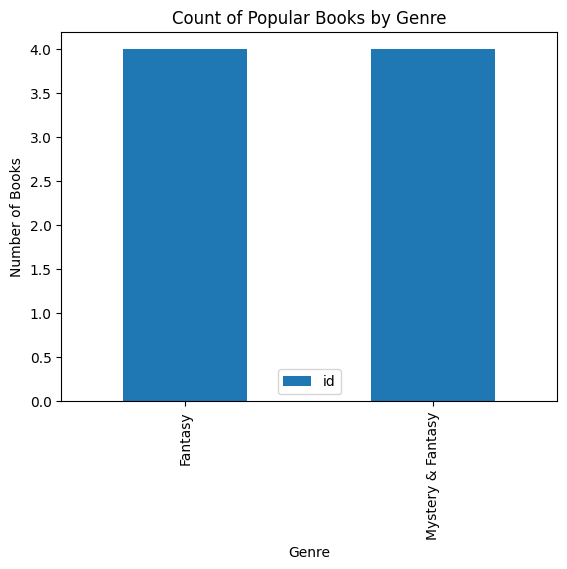

In [4]:
import matplotlib.pyplot as plt

popular_books = pd.read_csv(r'C:\Users\Dell\OneDrive\Desktop\KaranCodes\Datacampcourses\Associate-Data-Scientist-Python-Track\resources\joiningdatawithpandas\popular_books .csv')

# Merge mystery_books and fantasy_books together first (optional)
book_to_genres = mystery_books.merge(fantasy_books, how='outer', on='book_id')

# Create a "genre" column
def assign_genre(row):
    if pd.notna(row['genre_mys']) and pd.notna(row['genre_fan']):
        return 'Mystery & Fantasy'
    elif pd.notna(row['genre_mys']):
        return 'Mystery'
    elif pd.notna(row['genre_fan']):
        return 'Fantasy'
    else:
        return None

book_to_genres['genre'] = book_to_genres.apply(assign_genre, axis=1)

# Use right join to merge book_to_genres with popular_books
genres_books = book_to_genres.merge(popular_books, how='right', left_on='book_id', right_on='id')

# Count the number of books in each genre
genre_count = genres_books.groupby('genre').agg({'id':'count'})

# Plot a bar chart of the genre_count
genre_count.plot(kind='bar')
plt.title('Count of Popular Books by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Books')
plt.show()

## Outer Join to select rows from both tables

In [5]:
merged_books = mystery_books.merge(fantasy_books, on='book_id', how='outer', suffixes=('_mystery', '_fantasy'))

# Display the merged DataFrame
print(merged_books)

    book_id genre_mys genre_fan
0         1   Mystery       NaN
1         2       NaN   Fantasy
2         3   Mystery   Fantasy
3         5   Mystery       NaN
4         6       NaN   Fantasy
5         7   Mystery   Fantasy
6         9       NaN   Fantasy
7        10   Mystery       NaN
8        12       NaN   Fantasy
9        13   Mystery       NaN
10       15   Mystery   Fantasy
11       17   Mystery       NaN
12       18       NaN   Fantasy
13       20   Mystery   Fantasy
14       22   Mystery       NaN
15       23       NaN   Fantasy
